In [1]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")
#device = torch.device("cpu")    

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce RTX 3060 Ti


In [2]:
# load data
import pandas as pd

# Load the dataset into a pandas dataframe.
df = pd.read_csv("./processed_reviews.csv", delimiter=',')

# Report the number of reviews.
print('Number of reviews: {:,}\n'.format(df.shape[0]))

# Display the first 10 rows from the data.
df.head(10)

Number of reviews: 21,966



,Customer,Country,Date,Rating,Title,Reviews,Channels,Issues,Sentiment
0,xxx xxx,GB,"Updated Apr 4, 2022",5,The best in all that matters,The best in all that matters! It's a great pla...,chatbot or live agent,0,5
1,Javier Setovich,US,"Mar 8, 2022",5,Celsius Network ROCKS!,If you are looking for the best #HomeForCrypto...,0,0,5
2,Andrei Franco,VN,"Mar 23, 2022",1,I despise it so much,I despise it so much. Transferring to other wa...,ib or mb,content-clarity,1
3,Isai Garcia,US,"Feb 23, 2022",1,Worst customer service and worst…,Worst customer service and worst company to de...,mobile banking,0,1
4,Tyler McMurray,US,"Mar 22, 2022",5,Celsius is the BEST in Crypto,Celsius is the most transparent and responsive...,ib or mb,0,5
5,Leo,MX,"Jun 11, 2022",5,Best place to store crypto,"Best wallet to manage, store and get rewards w...",mobile banking,enquiries-account,5
6,Carlos,US,"Jun 7, 2022",1,Loan Collateral Held Hostage,I took out a loan but now I cant pay the princ...,ib or mb,technical-statements,1
7,Sam Desai,US,"Mar 20, 2022",5,Celsius Network is one of the best…,Celsius Network is one of the best Crypto Apps...,mobile banking,content-clarity,5
8,Mehmet Çağlıyangil,TR,"May 6, 2022",5,Underrated!,Celsius is one of the most underrated crypto r...,0,0,5
9,Facundo Sago,AR,"Updated May 28, 2022",2,Poor customer service! Atencion al cliente muy...,They suspended my account without reason. They...,chatbot or live agent,0,1


In [3]:
# filter off reviews without issue type
df2 = df.loc[df["Issues"] != "0"]
print('Number of reviews: {:,}\n'.format(df2.shape[0]))
df2.head(10)

Number of reviews: 8,838



,Customer,Country,Date,Rating,Title,Reviews,Channels,Issues,Sentiment
2,Andrei Franco,VN,"Mar 23, 2022",1,I despise it so much,I despise it so much. Transferring to other wa...,ib or mb,content-clarity,1
5,Leo,MX,"Jun 11, 2022",5,Best place to store crypto,"Best wallet to manage, store and get rewards w...",mobile banking,enquiries-account,5
6,Carlos,US,"Jun 7, 2022",1,Loan Collateral Held Hostage,I took out a loan but now I cant pay the princ...,ib or mb,technical-statements,1
7,Sam Desai,US,"Mar 20, 2022",5,Celsius Network is one of the best…,Celsius Network is one of the best Crypto Apps...,mobile banking,content-clarity,5
10,rogelio romero,PA,"Updated Feb 1, 2022",5,Ive being a celsiasn for over 2 years…,Ive being a celsiasn for over 2 years so excit...,pweb,enquiries-account,5
11,Andy Gimino,US,"Apr 12, 2022",5,Best home for your assets and passive income!,Been on the platform for almost three years an...,ib or mb,technical-service unavailable,5
12,Rick Arnold,US,"Mar 20, 2022",5,Simply the Best!,Simply the Best!No fees ever for anything! Rew...,chatbot or live agent,enquiries-account,5
13,Kishen Ratilal,US,"Jun 17, 2022",5,"Great app, team and community!","Great app, team and community. Have been using...",ib or mb,technical-service unavailable,5
14,Hany Ishak,CA,"Jan 25, 2022",5,Celsius Network Promo Code,Took advantage of one of the Celsius Network p...,ib or mb,technical-statements,5
16,SRS,US,"Nov 27, 2021",1,be aware of these scammers,be aware of these scammers. they get your mone...,ib or mb,enquiries-fraud,1


In [4]:
# Display 10 random rows from the data.
df2.sample(10)

,Customer,Country,Date,Rating,Title,Reviews,Channels,Issues,Sentiment
2865,Maxine Jen,US,"Jul 13, 2022",1,Getting Paid to days early is not worth it!,Hello My name is Jennifer Reynolds. My issue i...,ib or mb,technical-logging,1
12533,Jurek Martinez,US,"Sep 4, 2020",1,THINK TWICE IF YOU ARE BANKING WITH…,THINK TWICE IF YOU ARE BANKING WITH CHIME. TOD...,internet banking,technical-service unavailable,1
11318,Alicia Castaneda,US,"Dec 16, 2021",1,Thieves,Please do not sign up for chime. It seems like...,chatbot or live agent,enquiries-account,1
21845,Jeffrey Mark,US,"Oct 28, 2021",1,"Terrible Online, Customer Service",Have been a small business customer for 2 year...,chatbot or live agent,enquiries-email,1
1068,JK,HK,"Dec 12, 2020",5,Great experience with Celsius Network,Great experience with Celsius Network. I’ve be...,mobile banking,technical-logging-authentication-token,5
12883,Ronny H,US,"Jul 3, 2020",1,Can't open an account,"Can't open an account, but who knows what went...",chatbot or live agent,enquiries-account,1
21419,Alexa,US,"Jan 7, 2020",5,Never any issues,"Never any issues, love the card, and an easy a...",0,technical-submission,5
17417,James,GB,"Apr 6, 2018",5,Great,Great service. Helped me restructure my debt.,0,technical-service unavailable,5
8985,sandra hindmon,US,"Oct 22, 2022",1,The app is a joke while trying to use…,The app is a joke while trying to use my point...,ib or mb,enquiries-account,1
8180,Patrice Brown,US,"Nov 15, 2022",5,Transfers are always easy,I’m able to send money to my loved one with no...,0,enquiries-account,5


<Axes: xlabel='Issues'>

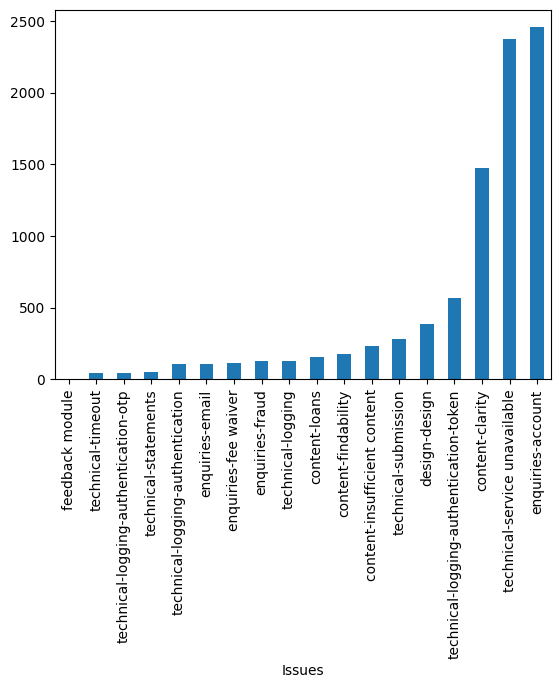

In [5]:

df2["Issues"].value_counts().sort_values().plot(kind='bar') 


In [6]:
# filter off unbalanced data
df2 = df.loc[df["Issues"] != "0"]


In [7]:
def getReviewsAndLabels(d):
    return list(d["Reviews"]),torch.Tensor(d.Issues)

In [8]:
issuetypes = ['content-clarity', 'enquiries-account', 
       'technical-service unavailable', 
       'technical-logging-authentication-token',
      ]

# filter off unbalanced data
df2 = df2.loc[df2["Issues"].isin(issuetypes)]
len(df2["Issues"].unique())


4

In [9]:
import numpy as np
#just  take reviews and the issue type
df3 = df2[["Reviews","Issues"]]
# df3["Issues"] = df3["Issues"].replace(issuetypes,[i for i in range(len(issuetypes))])
### map each color to an integer
mapping = {}
for x in range(len(issuetypes)):
  mapping[issuetypes[x]] = x
one_hot_encode = []
for index,row in df3.iterrows():
  arr = list(np.zeros(len(issuetypes), dtype = int))
  arr[mapping[row["Issues"]]] = 1
  one_hot_encode.append(arr)
  df3.loc[index,"Issues"] = arr

print(one_hot_encode)
df3.head()



C:\Users\clome\AppData\Local\Temp\ipykernel_6800\1552618498.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[index,"Issues"] = arr


[[1, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0

,Reviews,Issues
2,I despise it so much. Transferring to other wa...,"[1, 0, 0, 0]"
5,"Best wallet to manage, store and get rewards w...","[0, 1, 0, 0]"
7,Celsius Network is one of the best Crypto Apps...,"[1, 0, 0, 0]"
10,Ive being a celsiasn for over 2 years so excit...,"[0, 1, 0, 0]"
11,Been on the platform for almost three years an...,"[0, 0, 1, 0]"


In [10]:
import numpy as np
msk = np.random.rand(len(df3)) < 0.8
train = df3[msk]
train = train.reset_index(drop=True)
test = df3[~msk]
test = test.reset_index(drop=True)
print(len(train))
print(len(test))

5586
1291


In [11]:
t_reviews,t_issues = getReviewsAndLabels(train)
print(f'reviews size: {len(t_reviews)}')
print(f'label set: {t_issues.shape}')

reviews size: 5586
label set: torch.Size([5586, 4])


In [12]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

c:\Users\clome\anaconda3\envs\tf-gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading BERT tokenizer...


In [13]:
from transformers import BertForSequenceClassification, AdamW, BertConfig,BertModel


In [14]:
max_len = 0

# For every sentence...
for sent in t_reviews:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (582 > 512). Running this sequence through the model will result in indexing errors


Max sentence length:  1167


In [15]:
encoded_sents = tokenizer(t_reviews,
                          max_length = 512,           # Pad & truncate all sentences.
                          padding = 'max_length',
                          truncation=True,
                          return_attention_mask = True,   # Construct attn. masks.
                          return_tensors = 'pt'     # Return pytorch tensors.
)

In [16]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
#dataset = TensorDataset(input_ids, attention_masks, labels)
dataset = TensorDataset(encoded_sents['input_ids'], encoded_sents['attention_mask'], t_issues)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

5,027 training samples
  559 validation samples


In [17]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it
# here. For fine-tuning BERT on a specific task, the authors recommend a batch
# size of 16 or 32.
batch_size = 8

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order.
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [18]:
import random
import numpy as np
import time

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss,
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()



In [19]:
# Creating the customized model, by adding a drop out and a dense layer on top of distil bert to get the final output for the model. 

# class BERTClass(torch.nn.Module):
#     def __init__(self):
#         super(BERTClass, self).__init__()
#         self.l1 = BertModel.from_pretrained('bert-base-uncased')
#         self.l2 = torch.nn.Dropout(0.3)
#         self.l3 = torch.nn.Linear(768, len(issuetypes))
    
#     def forward(self, ids, mask, token_type_ids):
#         _, output_1= self.l1(ids, attention_mask = mask, token_type_ids = token_type_ids, return_dict=False)
#         output_2 = self.l2(output_1)
#         output = self.l3(output_2)
#         return output

# model = BERTClass()
# model.to(device)


model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = len(issuetypes), # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)
model.cuda()

# model = BertModel.from_pretrained(
#     "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
#     num_labels = len(issuetypes), # The number of output labels--2 for binary classification.
#                     # You can increase this for multi-class tasks.
#     output_attentions = False, # Whether the model returns attentions weights.
#     output_hidden_states = False, # Whether the model returns all hidden-states.
# )

# model.cuda()


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [20]:
LEARNING_RATE = 2e-05
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE, eps = 1e-8)

In [21]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4.
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs].
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs
print(total_steps)

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

2516


In [22]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

In [23]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [24]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat =  np.argmax(labels, axis=1).flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [25]:
def train(epoch):
    model.train()
    for _,data in enumerate(train_dataloader):
        b_input_ids = data[0].to(device,dtype = torch.long)
        b_input_mask = data[1].to(device,dtype = torch.long)
        b_labels = data[2].to(device,dtype = torch.float32)
        model.zero_grad()
        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask,
                        labels=b_labels)

        optimizer.zero_grad()
        loss = outputs.loss
        if _%5000==0:
            print(f'Epoch: {epoch}, Loss:  {loss.item()}')
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [26]:
# for epoch in range(16):
#     train(epoch)

In [27]:

from sklearn import metrics
def validation(epoch):
    model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0
    t0 = time.time()
    with torch.no_grad():
        for _, data in enumerate(validation_dataloader):
            b_input_ids = data[0].to(device,dtype = torch.long)
            b_input_mask = data[1].to(device,dtype = torch.long)
            b_labels = data[2].to(device,dtype = torch.float32)
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask,
                            labels=b_labels)
            loss = outputs.loss
            total_eval_loss += loss.item()
            # Move logits and labels to CPU
            logits = outputs.logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()
            # Calculate the accuracy for this batch of test sentences, and
            # accumulate it over all batches.
            
            total_eval_accuracy += flat_accuracy(logits,label_ids)
        # Report the final accuracy for this validation run.
        avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
        print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

        # Calculate the average loss over all of the batches.
        avg_val_loss = total_eval_loss / len(validation_dataloader)

        # Measure how long the validation run took.
        validation_time = format_time(time.time() - t0)

        print("  Validation Loss: {0:.2f}".format(avg_val_loss))
        print("  Validation took: {:}".format(validation_time))

In [28]:
# from sklearn import metrics

# for epoch in range(16 ):
#     validation(epoch)

In [29]:
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()
# For each epoch...
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()


# For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        b_labels=b_labels.to(torch.float32)
        model.zero_grad()
        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask,
                        labels=b_labels)
        loss = outputs.loss
        total_train_loss += loss.item()
        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)

    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(training_time))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        with torch.no_grad():
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask,
                            labels=b_labels)

        # Accumulate the validation loss.
        loss = outputs.loss
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = outputs.logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)


    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)

    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    629.    Elapsed: 0:00:18.
  Batch    80  of    629.    Elapsed: 0:00:35.
  Batch   120  of    629.    Elapsed: 0:00:51.
  Batch   160  of    629.    Elapsed: 0:01:08.
  Batch   200  of    629.    Elapsed: 0:01:24.
  Batch   240  of    629.    Elapsed: 0:01:41.
  Batch   280  of    629.    Elapsed: 0:01:58.
  Batch   320  of    629.    Elapsed: 0:02:14.
  Batch   360  of    629.    Elapsed: 0:02:31.
  Batch   400  of    629.    Elapsed: 0:02:48.
  Batch   440  of    629.    Elapsed: 0:03:04.
  Batch   480  of    629.    Elapsed: 0:03:21.
  Batch   520  of    629.    Elapsed: 0:03:37.
  Batch   560  of    629.    Elapsed: 0:03:54.
  Batch   600  of    629.    Elapsed: 0:04:11.

  Average training loss: 0.38
  Training epoch took: 0:04:23

Running Validation...
  Accuracy: 0.79
  Validation Loss: 0.26
  Validation took: 0:00:10

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    629.    Elapsed: 0:00:17.
  Batch  

In [30]:
training_stats

[{'epoch': 1,
  'Training Loss': 0.3772652645274073,
  'Valid. Loss': 0.25716802179813386,
  'Valid. Accur.': 0.7887755102040817,
  'Training Time': '0:04:23',
  'Validation Time': '0:00:10'},
 {'epoch': 2,
  'Training Loss': 0.1933191771454671,
  'Valid. Loss': 0.16821715563003506,
  'Valid. Accur.': 0.8783163265306122,
  'Training Time': '0:04:22',
  'Validation Time': '0:00:10'},
 {'epoch': 3,
  'Training Loss': 0.08569465374310511,
  'Valid. Loss': 0.16991904017382434,
  'Valid. Accur.': 0.8821428571428571,
  'Training Time': '0:03:55',
  'Validation Time': '0:00:09'},
 {'epoch': 4,
  'Training Loss': 0.038172260766318855,
  'Valid. Loss': 0.18333764299085098,
  'Valid. Accur.': 0.8892857142857142,
  'Training Time': '0:03:54',
  'Validation Time': '0:00:09'}]

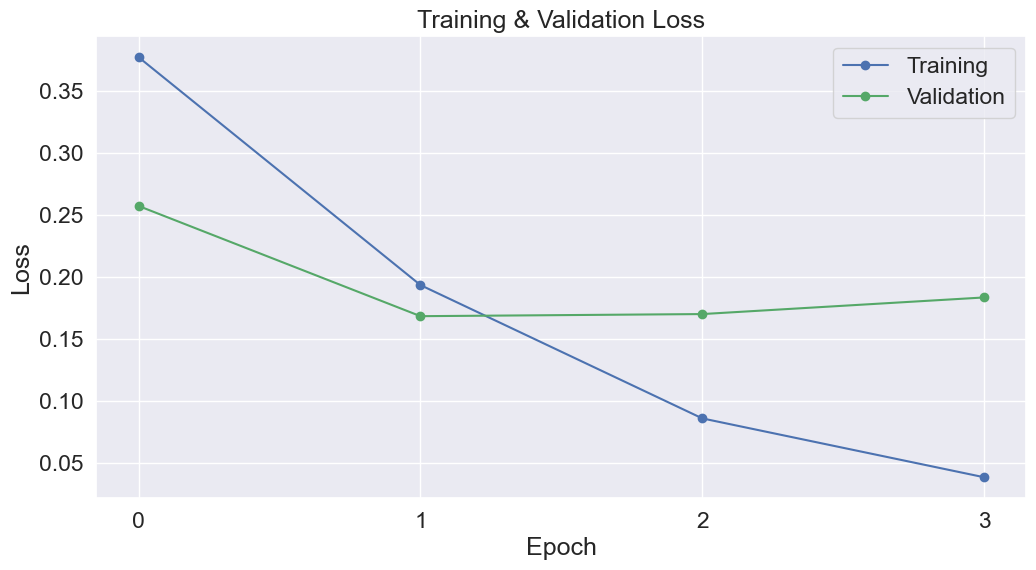

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

df_stats = pd.DataFrame(data=training_stats)

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([0,1, 2, 3])

plt.show()

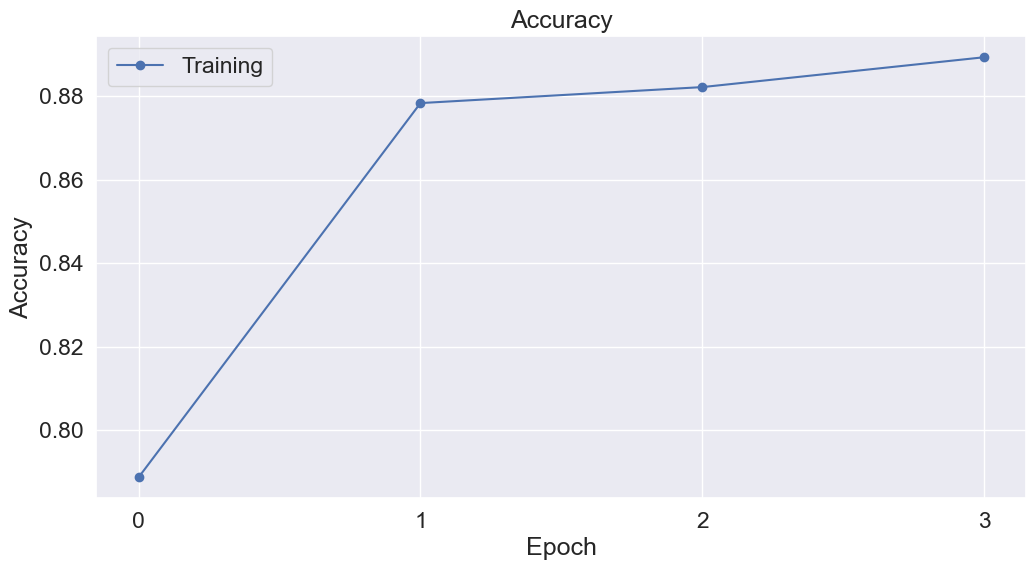

In [40]:

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Valid. Accur.'], 'b-o', label="Training")

# Label the plot.
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.xticks([0,1, 2, 3])

plt.show()

In [32]:
import pandas as pd

ts_reviews,ts_issues = getReviewsAndLabels(test)
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in ts_reviews:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 512,           # Pad & truncate all sentences.
                        truncation = True,
                        padding = 'max_length',
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)


# Set the batch size.
batch_size = 8

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, ts_issues)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [33]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables
predictions , true_labels = [], []

# Predict
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch

  # Telling the model not to compute or store gradients, saving memory and
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      # outputs = model(b_input_ids, token_type_ids=None,
      #                 attention_mask=b_input_mask)
      outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask,
                            labels=b_labels)

  # logits = outputs[0]

  # # Move logits and labels to CPU
  # logits = logits.detach().cpu().numpy()
  # label_ids = b_labels.to('cpu').numpy()

  # # Store predictions and true labels
  # predictions.append(logits)
  # true_labels.append(label_ids)

  true_labels.extend(b_labels.cpu().detach().numpy().tolist())
  predictions.extend(outputs.logits.detach().cpu().numpy().tolist())

print('    DONE.')

Predicting labels for 1,291 test sentences...
    DONE.


In [34]:
predictions[0]

[3.899488687515259,
 -5.163113117218018,
 -4.567297458648682,
 -4.1655802726745605]

In [35]:
# total_test_accuracy = 0
# for p, t in zip(predictions, true_labels):
#   print("Accuracy for batch: ", flat_accuracy(p, t))
#   total_test_accuracy += flat_accuracy(p, t)
print("Accuracy: ", flat_accuracy(predictions,true_labels ))

# print("Overall accuracy for test set:", total_test_accuracy/len(predictions))

Accuracy:  0.8745158791634392


In [36]:
torch.save(model.state_dict(),'./fune_tuned_model.pt')